<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/feedforward-neural-network/NN_Fisher's_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <img title="NeuralNetwork" src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/feedforward-neural-network/Colored_neural_network.svg.png?raw=1" width="400" /> <br> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [2]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 612 (delta 112), reused 114 (delta 62), pack-reused 417
Receiving objects: 100% (612/612), 30.47 MiB | 20.62 MiB/s, done.
Resolving deltas: 100% (329/329), done.


In [3]:
df = pd.read_csv('/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/iris-data.csv')

In [4]:
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))

# One Hidden Layer

In [40]:
def find_accuracy(X_temp,Y_temp):
  acc=0
  m_temp=X_temp.shape[0]
  for i_temp in range(m_temp):
    x= X_temp[i_temp,:].reshape(n_feature+1,1)
    z2=np.dot(theta1,x)
    h2=sigmoid(z2)
    h2=np.r_[np.array(1).reshape(1,1), h2]
    z3=np.dot(theta2,h2)
    h3=sigmoid(z3)
    if Y_temp[i_temp,np.argmax(h3)]==1:
      acc+=1
  acc=acc/m_temp*100
  return acc

In [58]:
X = df.iloc[:, :4]        #features
m=X.shape[0]
p=X.shape[1]
X = np.c_[np.ones((m, 1)), X]    #we need x_0
X=np.array(X)
iris_type= df.iloc[:, 4]         #outcome
Y=[[1, 0, 0] if iris_type[i]=='Iris-setosa' else [0, 1, 0] if iris_type[i]=='Iris-versicolor' else [0, 0, 1] for i in range(m)]
Y=np.array(Y)
o=Y.shape[1]

In [59]:
stack=list(range(m))
N_test=20
rd.shuffle(stack)
stack_test=stack[:N_test]
stack_train=stack[N_test:]

In [60]:
X_train = X[stack_train,:]
m_train=X_train.shape[0]
Y_train = Y[stack_train]

In [61]:
X_test = X[stack_test,:]
m_test=X_test.shape[0]
Y_test = Y[stack_test]

In [62]:
#NN configurations
n_nodes=3
n_feature=p
n_output=o
theta1=np.random.random((n_nodes,n_feature+1))-1/2
theta2=np.random.random((n_output,n_nodes+1))-1/2

In [63]:
alpha=4
n_itr=1000
I=int(n_itr/10)
cost_history=[]
acc_train_history=[]
acc_test_history=[]
for itr in range(n_itr):
  J=0
  acc_train=0
  for data_index in range(m_train):
    #forward propagation
    x= X_train[[data_index],:].T
    z2=np.dot(theta1,x)
    h2=sigmoid(z2)
    h2=np.r_[np.ones((1,1)), h2]
    z3=np.dot(theta2,h2)
    h3=sigmoid(z3)
    #back propagation
    Ym=h3-Y_train[[data_index],:].T
    delta3=2/m_train*(Ym*h3*(1-h3))
    theta2=theta2-alpha*delta3@h2.T
    delta2=theta2.T@(delta3)*h2*(1-h2)
    theta1=theta1-alpha*delta2[1:,:]@x.T
    J+=np.linalg.norm(Ym,2)
    if Y_train[data_index,np.argmax(h3)]==1:
      acc_train+=1
  acc_train*=100/m_train
  J/=m_train
  cost_history.append(J)
  acc_train_history.append(acc_train)
  acc_test_history.append(find_accuracy(X_test, Y_test))
  if (itr+1) % I==0:
    alpha/=1.2
    print('Complete:',int((itr+1)/I))
    print('The cost of train sample is {:.6f}'.format(J))
    print('The accuracy of train sample is {:.2f}'.format(acc_train))
    print('The accuracy of test sample is {:.2f}'.format(acc_test_history[-1]))

Complete: 1
The cost of train sample is 0.281671
The accuracy of train sample is 95.38
The accuracy of test sample is 100.00
Complete: 2
The cost of train sample is 0.179777
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 3
The cost of train sample is 0.148731
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 4
The cost of train sample is 0.135621
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 5
The cost of train sample is 0.128198
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 6
The cost of train sample is 0.122276
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 7
The cost of train sample is 0.117252
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00
Complete: 8
The cost of train sample is 0.113075
The accuracy of train sample is 96.92
The accuracy of test sample is 100.00


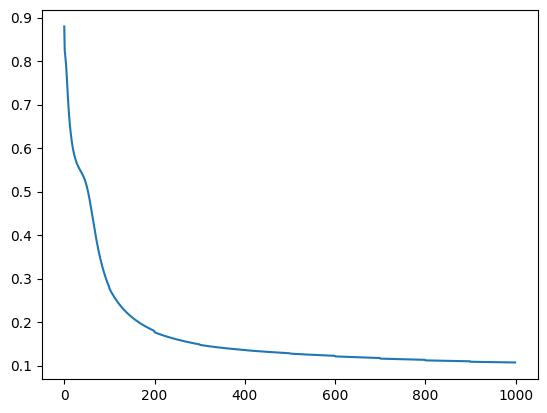

In [64]:
plt.plot(cost_history)

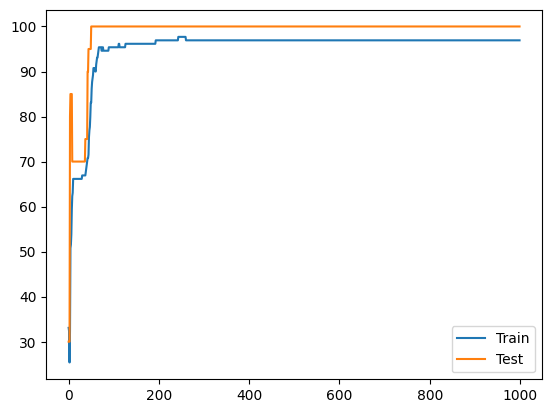

In [65]:
plt.plot(acc_train_history,label='Train')
plt.plot(acc_test_history,label='Test')
plt.legend()

In [66]:
index_temp=54
x= X[[index_temp],:].T
z2=np.dot(theta1,x)
h2=sigmoid(z2)
h2=np.r_[np.ones((1,1)), h2]
z3=np.dot(theta2,h2)
h3=sigmoid(z3)
print(h3)
print(Y[index_temp])
print(h3[Y[index_temp]]==max(h3))

[[0.03616705]
 [0.94820761]
 [0.04087911]]
[0 1 0]
[[False]
 [ True]
 [False]]
